**Wiktor Ligęza, Inżynieria Obliczeniowa, gr.2**  
**Data: 01/11/2021**   
**Ćwiczenie: 4**   
**Temat: Filtrowanie obrazów w dziedzinie częstotliwości** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from PIL import Image
import cv2

### Funckje

In [2]:
def create_img(path, type_=0):
    '''
    path: file path and name
    type_: 0-horizontal, 1-vertical
    
    '''
    out = np.zeros(512 * 512).reshape((512, 512))
    x = np.shape(out)[0]
    y = np.shape(out)[1]
    for i in range(1, x - 1):
        for j in range(1, y - 1):
            if j > 236 and j< 276 and i> 246 and i < 266:
                out[i][j] = 1
            else:
                out[i][j] = 0
    if type_ != 0:            
        out = np.rot90(out)
    Image.fromarray(np.uint8(out * 255), 'L').save(path, "JPEG", quality=80, optimize=True, progressive=True)

    
def get_spectrum(img):
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    b = np.log(abs(img_fft)+1)
    return 255*b/np.max(b)

In [3]:
create_img("horizontal.jpg", 0)
create_img("vertical.jpg", 1)

# ZAD 1

Oblicz transformatę Fouriera dwóch poniższych obrazów o wymiarach 512x512 pikseli i wyświetl ich widmo

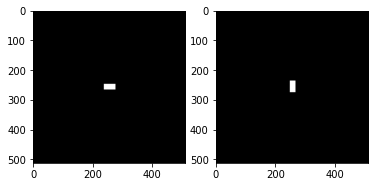

In [4]:
fig, axs = plt.subplots(1 ,2)
axs[0].imshow(255*(imread("horizontal.jpg", 'L')>125), cmap="gray");
axs[1].imshow(255*(imread("vertical.jpg", 'L')>125), cmap="gray");

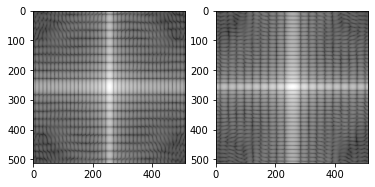

In [5]:
fig, axs = plt.subplots(1 ,2);
axs[0].imshow(get_spectrum(imread("horizontal.jpg", 'L')), cmap='gray');
axs[1].imshow(get_spectrum(imread("vertical.jpg", 'L')), cmap='gray');